In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score

In [28]:
df = pd.read_csv('JHipster-gp.csv') 

In [40]:
# MariaDB + Gradle = fails
df2 = df[df["prodDatabaseType"] == '"mariadb"'] 
logs4222 = df2[df2["buildTool"] == '"gradle"']['Log-Build'] # https://github.com/jhipster/generator-jhipster/pull/4222
print(len(logs4222))
for log in logs4222:
    if (isinstance(log, float)):
        print("strange", log)
        continue
    if ("jdbc:mariadb" in log): # pattern 1
        continue
    elif ("jhipster-mariadb" in log): # pattern 2
        continue
    else:
        print("other kind of failure?", log)
        


4248
strange nan
strange nan
strange nan
strange nan
other kind of failure? ND
other kind of failure? COMPILATION ERROR
strange nan
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
other kind of failure? COMPILATION ERROR
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
strange nan
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
other kind of failure? COMPILATION ERROR
strange nan
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
other kind of failure? COMPILATION ERROR
other kind of failure? ND
othe

In [48]:
df3 = df[df["Docker"] == True] 
logs4543 = df3[df3["authenticationType"] == '"uaa"']['Log-Build'] # https://github.com/jhipster/generator-jhipster/pull/4222
masking = 0
print(len(logs4543))
for log in logs4543:
    if (isinstance(log, float)):
        print("strange", log)
        continue
    if ("jdbc:mariadb" in log): # pattern 1
        print("MariaDB bug?", log)
        break
        masking = masking + 1
    elif ("jhipster-mariadb" in log): # pattern 2
        print("MariaDB bug (2)?")
        masking = masking + 1
    else:
        print("normal", log)
        continue

masking

2244
MariaDB bug (2)?
normal Exception encountered during context initialization - cancelling refresh attempt: org.springframework.beans.factory.UnsatisfiedDependencyException: Error creating bean with name 'org.springframework.security.oauth2.config.annotation.web.configuration.ResourceServerConfiguration': Unsatisfied dependency expressed through field 'tokenStore': Error creating bean with name 'tokenStore' defined in class path resource [io/variability/jhipster/config/MicroserviceSecurityConfiguration.class]: Bean instantiation via factory method failed; nested exception is org.springframework.beans.BeanInstantiationException: Failed to instantiate [org.springframework.security.oauth2.provider.token.TokenStore]: Factory method 'tokenStore' threw exception; nested exception is org.springframework.beans.factory.BeanCreationException: Error creating bean with name 'jwtAccessTokenConverter' defined in class path resource [io/variability/jhipster/config/MicroserviceSecurityConfiguration

3

In [4]:
df.drop(columns=['Compile', 'Log-Build', 'Log-Compile', 'Log-Generate', 'Generate', 'JHipsterRegister', 'testFrameworks'], inplace=True)
df

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build
0,True,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
1,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
2,True,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
3,False,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
4,True,"""monolith""","""jwt""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mysql""","""maven""","""elasticsearch""",false,true,True,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""InMemory""","""mysql""","""gradle""","""elasticsearch""",true,false,True,OK
26252,True,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26253,False,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26254,True,"""monolith""","""session""","""no""","""no""","""no""","""sql""","""DiskBased""","""mariadb""","""maven""","""elasticsearch""",true,true,True,OK


In [5]:
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build
0,1,2,2,2,0,1,3,0,1,0,0,1,1,0,0
1,0,2,2,2,0,1,3,0,1,0,0,1,1,0,0
2,1,2,0,2,1,1,1,4,2,0,1,1,1,1,1
3,0,2,0,2,1,1,1,4,2,0,1,1,1,1,1
4,1,2,0,2,0,1,3,0,3,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,0,2,2,2,0,1,3,1,3,0,0,2,1,1,1
26252,1,2,1,2,0,0,3,7,5,0,0,1,1,1,1
26253,0,2,1,2,0,0,3,7,5,0,0,1,1,1,1
26254,1,2,2,2,1,0,3,0,1,1,0,2,2,1,1


In [6]:
df.apply(LabelEncoder().fit_transform)["databaseType"].unique()

array([3, 1, 0, 2])

In [7]:
df["databaseType"].unique()

array(['"sql"', '"mongodb"', '"cassandra"', '"no"'], dtype=object)

In [8]:
df

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build
0,True,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
1,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mariadb""","""gradle""","""elasticsearch""",false,false,False,KO
2,True,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
3,False,"""monolith""","""jwt""","""no""","""no""","""spring-websocket""","""mongodb""","""mongodb""","""mongodb""","""gradle""","""no""",false,false,True,OK
4,True,"""monolith""","""jwt""","""no""","""hazelcast""","""spring-websocket""","""sql""","""DiskBased""","""mysql""","""maven""","""elasticsearch""",false,true,True,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,False,"""monolith""","""session""","""no""","""hazelcast""","""spring-websocket""","""sql""","""InMemory""","""mysql""","""gradle""","""elasticsearch""",true,false,True,OK
26252,True,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26253,False,"""monolith""","""oauth2""","""no""","""hazelcast""","""no""","""sql""","""postgresql""","""postgresql""","""gradle""","""elasticsearch""",false,false,True,OK
26254,True,"""monolith""","""session""","""no""","""no""","""no""","""sql""","""DiskBased""","""mariadb""","""maven""","""elasticsearch""",true,true,True,OK


In [9]:
X = df_encoded.drop(columns=["Build"])
y = df_encoded["Build"]

In [10]:
test_size=0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

clf = RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9664423850027506

In [11]:
test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9693784277879341

In [12]:
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9623000761614623

In [13]:
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9291698400609292

In [14]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 190.26, 'authenticationType <= 2.5\ngini = 0.459\nsamples = 23630\nvalue = [8419, 15211]'),
 Text(83.7, 135.9, 'prodDatabaseType <= 2.5\ngini = 0.366\nsamples = 19594\nvalue = [4719, 14875]'),
 Text(41.85, 81.53999999999999, 'buildTool <= 0.5\ngini = 0.481\nsamples = 6857\nvalue = [4089, 2768]'),
 Text(20.925, 27.180000000000007, 'gini = 0.09\nsamples = 3424\nvalue = [3262, 162]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.366\nsamples = 3433\nvalue = [827, 2606]'),
 Text(125.55000000000001, 81.53999999999999, 'Docker <= 0.5\ngini = 0.094\nsamples = 12737\nvalue = [630, 12107]'),
 Text(104.625, 27.180000000000007, 'gini = 0.008\nsamples = 6415\nvalue = [27, 6388]'),
 Text(146.475, 27.180000000000007, 'gini = 0.173\nsamples = 6322\nvalue = [603, 5719]'),
 Text(251.10000000000002, 135.9, 'applicationType <= 2.0\ngini = 0.153\nsamples = 4036\nvalue = [3700, 336]'),
 Text(209.25, 81.53999999999999, 'Docker <= 0.5\ngini = 0.013\nsamples = 3633\nvalue = [3609, 24]'

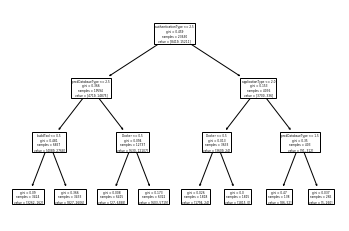

In [15]:
plot_tree(clf, feature_names=X.columns) 

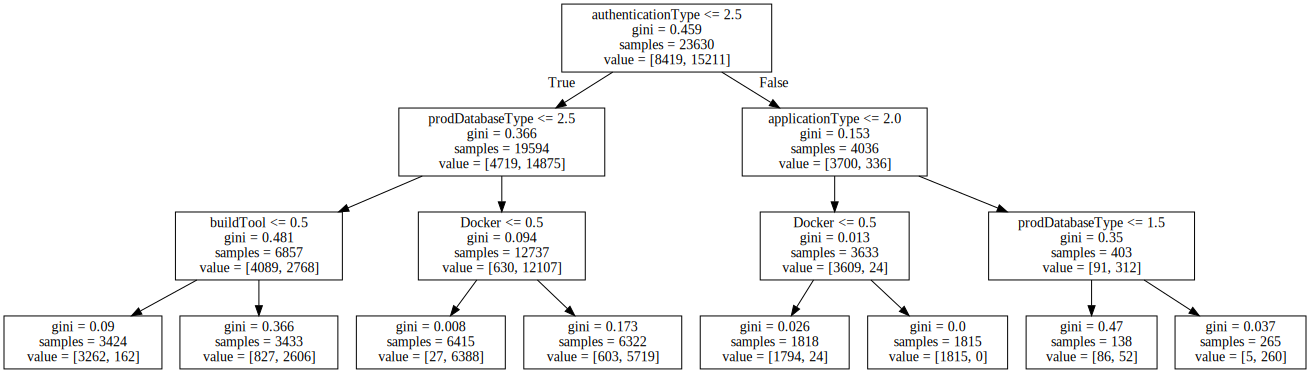

In [16]:
from graphviz import Source
from IPython.display import SVG
graph = Source( export_graphviz(clf, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

In [17]:
graph = Source( export_graphviz(clf, out_file=None, feature_names=X.columns))
graph.format = 'pdf'
graph.render('dtree_render', view=True)

'dtree_render.pdf'

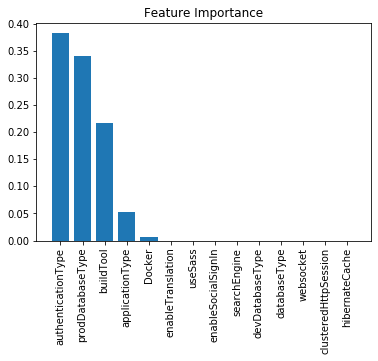

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/

importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [19]:
df.query('databaseType == `"sql"`') # seems not working... prefer the old school solution: df[df["prodDatabaseType"] == '"mariadb"'] 

,Docker,applicationType,authenticationType,hibernateCache,clusteredHttpSession,websocket,databaseType,devDatabaseType,prodDatabaseType,buildTool,searchEngine,enableSocialSignIn,useSass,enableTranslation,Build


In [20]:
df['prodDatabaseType'].unique()

array(['"mariadb"', '"mongodb"', '"mysql"', '"postgresql"', '"cassandra"',
       '"no"'], dtype=object)